#**Archisha Sinha**
##Course: Deep Learning
##Title: ANN Feedforwarding and Back Propogation on Iris Dataset



In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading the Iris dataset from a CSV file
irs = pd.read_csv("/content/Iris (1).csv")

In [3]:
# Displaying the first few rows of the dataset
irs.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# One-hot encoding the 'Species' column
species = pd.get_dummies(irs["Species"])
species

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [5]:
# Dropping the 'Species' column from the original dataset
irs.drop(["Species"], axis=1, inplace=True)

In [6]:
irs

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
# Standardizing the feature values using StandardScaler
std_sclr = StandardScaler()

In [8]:
irs_scaled = std_sclr.fit_transform(irs)

In [9]:
irs_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [10]:
# Creating a new DataFrame with standardized features
irs_trnsfrmd = pd.DataFrame(irs_scaled, columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
irs

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
irs_trnsfrmd

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [12]:
# Concatenating the standardized features with the one-hot encoded species
irs_fnl = pd.concat([irs_trnsfrmd, species], axis=1)

In [13]:
irs_fnl

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,-0.900681,1.032057,-1.341272,-1.312977,1,0,0
1,-1.143017,-0.124958,-1.341272,-1.312977,1,0,0
2,-1.385353,0.337848,-1.398138,-1.312977,1,0,0
3,-1.506521,0.106445,-1.284407,-1.312977,1,0,0
4,-1.021849,1.263460,-1.341272,-1.312977,1,0,0
...,...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,0,0,1
146,0.553333,-1.281972,0.705893,0.922064,0,0,1
147,0.795669,-0.124958,0.819624,1.053537,0,0,1
148,0.432165,0.800654,0.933356,1.447956,0,0,1


In [14]:
# Defining the global variable 'input'
global input

In [15]:
# Extracting the input features
input = irs_fnl.iloc[:, 0:4]

In [16]:
# Displaying the shape of the input features
input.shape

(150, 4)

In [17]:
input

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [18]:
species.shape

(150, 3)

In [19]:
# Defining the sigmoid activation function
def sgmd(x):
  eq = 1/1+(np.exp(-x))
  return eq

In [20]:
# Defining the accuracy calculation function
def acq(y_pred,y_true):
  acry = y_pred.argmax(axis=1)==y_true.argmax(axis=1)
  return acry.mean()

In [21]:
# Defining the mean squared error calculation function
def mean_sq_error(y_pred,y_true):
  eq = ((y_pred - y_true)**2).sum()/(2*len(y_pred))
  return eq

In [22]:
# Setting up neural network parameters
N = input.size
iterations = 5000
learning_rate = 0.01
input_size = 4
hidden_size = 2
output_size = 3

In [23]:
# Initializing weights and bias
results = pd.DataFrame(columns=["mse", "accuracy"])
np.random.seed(20)
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size))
bias = np.random.rand(1)

In [24]:
# Displaying the shapes of weights and bias
print(W1.shape)
print(W2.shape)
print(bias.shape)
print(input.shape)

(4, 2)
(2, 3)
(1,)
(150, 4)


In [25]:
# Feed Forward pass through the neural network
Z1 = np.dot(input,W1)+bias
A1 = sgmd(Z1)
Z2 = np.dot(A1,W2)
A2 = sgmd(Z2)

In [26]:
print(Z1.shape)
print(A1.shape)
print(Z1.shape)
print(A2.shape)

(150, 2)
(150, 2)
(150, 2)
(150, 3)


In [27]:
# Calculating the initial error
E1 = A2 - species

In [28]:
print(E1.shape)

(150, 3)


In [29]:
# Training the neural network through iterations
for i in range(iterations):
    # Forward pass
    Z1 = np.dot(input, W1) + bias
    A1 = sgmd(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sgmd(Z2)

    # Calculating mean squared error and accuracy
    mse = mean_sq_error(A2, np.array(species))
    acc = acq(A2, np.array(species))

    # Appending results to the DataFrame
    df2 = {"mse": mse, "accuracy": acc}
    results = results.append(df2, ignore_index=True)

    # Backpropagation
    E1 = A2 - species
    dw2 = E1 * A2 * (1 - A2)
    E2 = np.dot(dw2, W2.T)
    dw1 = E2 * A1 * (1 - A1)

    # Weight updates
    W2_update = np.dot(A1.T, dw2) / N
    W1_update = np.dot(input.T, dw1) / N
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

Streaming output truncated to the last 5000 lines.
<ipython-input-29-c97b09927917>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(df2, ignore_index=True)
<ipython-input-29-c97b09927917>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(df2, ignore_index=True)
<ipython-input-29-c97b09927917>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(df2, ignore_index=True)
<ipython-input-29-c97b09927917>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(df2, ignore_index=True)
<ipython-input-29-c97b09927917>:15: FutureWarning: The frame.append m

<Axes: >

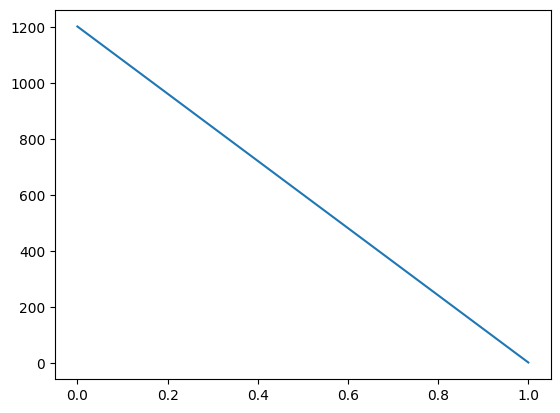

In [30]:
# Plotting the mean squared error over iterations
results["mse"].plot()

In [31]:
# Printing the final results
final_mse = results["mse"].iloc[-1]
final_accuracy = results["accuracy"].iloc[-1]

In [32]:
print("Final Mean Squared Error:", final_mse)
print("Final Accuracy:", final_accuracy)

Final Mean Squared Error: nan
Final Accuracy: 0.3333333333333333


In [33]:
# Saving the results to a CSV file
results.to_csv('/content/results.csv',index=False)